# Machine Learning and Statistics - Tasks 2020
***
### Task 1 
#### Write a Python function called `sqrt2` that calculates and prints to the screen the square root of 2 to 100 decimal places

* This program uses Newton's method (also known as the Newton-Raphson method) to calculate the square root of 2. It is commonly expressed as: 
<br>

$$ z = z - \frac{z^2 - x}{2z}$$

* The task requires that the function prints the result to 100 decimal places without using any modules from the standard library. 
* Python, however, stores floating point numbers correctly only to around 16 or 17 digits [1]. This is due to space limitations when storing these numbers in binary on the machine. 
* The square root of 2 is an *irrational number* and so it has an infinite number of decimals. Currently, the is has been computed to at least 10 trillion digits [2]. This exemplifies why floating point numbers in Python cannot have arbitrary precision. 
* In order to print such an irrational number to 100 decimal places, a different approach is needed. 
* The correct output could be displayed as a string, which would bypass the need to use a floating point number. Additionally it may be noted that integers in Python have arbitrary precision [3]. A combination of these two approaches may indeed be the route to completing this task to satisfaction.





<br>

<br>



The function below calculates the square root of two using Newton's method and returns the result. The code here is based on a function found at hackernoon.com [4]

In [1]:
def sqrt2():
    
    """
    This function calculates the square root of 2 using Newton's method
    """
    
    # Let the initial guess r be equal to 2 
    r = 2
    # The tolerance variable is set to a sufficiently low number for increased accuracy of returned value 
    tolerance = 10 ** (-10)
   
    # Loop until we reach desired accuracy
    while abs(2 - r * r) > tolerance:
        # Newton's method
        r = (r + 2 / r) / 2
        
    return r

In [2]:
# call function
sqrt2()

1.4142135623746899

<br>



We see here that the length of the value returned by the function is 18 characters (i.e. 16 decimal places). This is clearly insufficient for the task at hand

In [3]:
# print length of value returned
sqrt = sqrt2()
len(str(sqrt))

18

<br>



When looking for a solution to this task, I discoverd that the square root of 200, 20,000 and so on contains the same digits as the square root of two. The only change can be seen in the position of the decimal point. Below, I use a general function that outputs the square root of the number passed. I pass 2x10^200, which should yield the desired result. However, this is output in scientific notation and thus still not printing the desired result:

In [4]:
def mySqrt(x):

    """
    This function calculates the square root of a number passed as argument
    """
    
    r = x
    precision = 10 ** (-10)
    
    while abs(x - r * r) > precision:
        r = (r + x / r) / 2
        
    return r

In [5]:
# 2 followed by 200 zeros
b = 2*10**200

In [6]:
# call function with this number
y = mySqrt(b)
print(y)

1.414213562373095e+100


<br>



Below, I copy and pasted the square root of 2x10^20 and investigate what possibilites that might offer in arriving at a solution to the task. However, even importing an external library and passing the value of this number squared to the `sqrt()` function, the output is still represented as a floating point number with scientific notation:

In [7]:
# the square root of 2*10**20 copy and pasted
s = 14142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727350138462309122970249

In [8]:
s**2

199999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999992975302596006355342186646421860807470442275980493427789921836378022112490027674893060932709750538885270244811564139122001

In [9]:
a = s**2

In [10]:
# Import math module for investigation
import math

In [11]:
math.sqrt(a)

1.4142135623730951e+121

<br>



Here I include a few more slightly altered versions of the above but the results remain the same:

In [12]:
b

200000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [13]:
len(str(b))

201

In [14]:
math.sqrt(b)

1.414213562373095e+100

<br>



Speaking with fellow classmates, I found a solution to the problem via a contribution by a user on stackoverflow.com [5]. This is a response to a question posed by a classmate:

In [15]:
x = 2 * 10 ** 200

r = x

def test_diffs(x, r):
    d0 = abs(x - r**2)
    dm = abs(x - (r-1)**2)
    dp = abs(x - (r+1)**2)
    minimised = d0 <= dm and d0 <= dp
    below_min = dp < dm
    return minimised, below_min

while True:
    oldr = r
    r = (r + x // r) // 2

    minimised, below_min = test_diffs(x, r)
    if minimised:
        break

    if r == oldr:
        if below_min:
            r += 1
        else:
            r -= 1
        minimised, _ = test_diffs(x, r)
        if minimised:
            break

print(f'{r // 10**100}.{r % 10**100:0100d}')


1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


This does indeed print the square root of 2 to the screen. However, I must be clear that this is not my own work and it will take me some time to reverse engineer the function to fully understand how it works

### References

[1] luc.edu; Decimals, Floats and Floating Point Arithmetic; http://anh.cs.luc.edu/python/hands-on/3.1/handsonHtml/float.html <br>
[2] byjus.net; Square root of 2; https://byjus.com/maths/square-root-of-2/ <br>
[3] mortada.net; Can Integer Operations Overflow in Python?; https://mortada.net/can-integer-operations-overflow-in-python.html <br> 
[4] Regmi, S; Calculating the Square Root of a Number using the  Newton-Raphson Method (A How To Guide); https://hackernoon.com/calculating-the-square-root-of-a-number-using-the-newton-raphson-method-a-how-to-guide-yr4e32zo <br>
[5] stackoverflow.com; https://stackoverflow.com/questions/64278117/is-there-a-way-to-create-more-decimal-points-on-python-without-importing-a-libra <br>


<br>



#### End task 1

<br>

***


### Task 2 - Chi-squared test
#### This task uses `scipy.stats` to verify a known Chi-squared value of 24.6 based on the table below. It also calculates the p-value. The table is taken from the Wikipedia article on the Chi-squared test [1].

| 	        | A | B | C | D | total|
:-----------|:---:|:---:|:---:|:---:|:------:|
White collar| 90| 60|104| 95|349   |
Blue collar | 30| 50| 51| 20|151   |
No collar   | 30| 40| 45| 35|150   |
**Total**       |**150**|**150**|**200**|**150**|**650**   |


#### The Chi-squared formula below is integrated into the `chi2_contingency()` function used for the task:


$$ \chi^2 = \Sigma \frac{(O_i - E_i)^2}{E_i} $$



* Each column A, B, C and D represents a neighbourhood in a city with a population of 1,000,000. A random sample of 650 is taken and their occupation recorded as either White Collar, Blue Collar or No Collar.
* The null hypothesis is that each person's occupation classification is independent of the neighbourhood they live in
* Using the `chi2_contingency()` function, the Chi-squared value of 24.5712 is calculated. This verifies the the value provided by Wikipedia.
* The p-value is approximately 0.0004. Since this is less than the conventionally accepted significance level of 0.05 [2] we reject the null hypothesis: "For a Chi-square test, a p-value that is less than or equal to your significance level indicates there is sufficient evidence to conclude that the observed distribution is not the same as the expected distribution." [3]
* We can therefore accept the alternative hypothesis - that there *is* a relationship between occupation and neighbourhood in the city







<br>



In [16]:
# Import chi2_contingency function from the scipy.stats module
from scipy.stats import chi2_contingency
# Import numpy to generate array representing table values
import numpy as np

In [17]:
# Assign 3x4 array of observed values to variable obs
obs = np.array([[90, 60, 104, 95], [30, 50, 51, 20], [30, 40, 45, 35]])

In [18]:
# Use chi2_contingency function to generate Chi-squared value, p-value, 
# degrees of freedom and array of expected frequencies
chi2, p, dof, ex = chi2_contingency(obs, correction=False)

In [19]:
# p-value
p

0.0004098425861096696

In [20]:
# Chi-squared value
chi2

24.5712028585826

In [21]:
# Degrees of freedom
dof

6

In [22]:
# Array of expected value
ex

array([[ 80.53846154,  80.53846154, 107.38461538,  80.53846154],
       [ 34.84615385,  34.84615385,  46.46153846,  34.84615385],
       [ 34.61538462,  34.61538462,  46.15384615,  34.61538462]])

<br>



### References
[1] Wikipedia; Chi-squared test; https://en.wikipedia.org/wiki/Chi-squared_test <br>
[2] Eck, David and Ryan, Jim; The Chi Square Statistic; https://math.hws.edu/javamath/ryan/ChiSquare.html <br>
[3] Frost, Jim; Chi-Square Test of Independence and an Example; https://statisticsbyjim.com/hypothesis-testing/chi-square-test-independence-example/ 

<br>

#### End task 2

<br>



### Task 3 - Standard Deviation
***

#### Research the Microsoft Excel functions `STDEV.S` and `STDEV.P`, writing a note about the difference between them. Then use numpy to perform a simulation demonstrating that  the`STDEV.S` calculation is a better estimate than `STDEV.P` for the standard deviation of a population when performed on a sample.

<br>

### STDEV.S vs STDEV.P


* Both `STDEV.S` and `STDEV.P`, calculate the standard deviation of an array of numbers. The difference between them is better understood when we examine what lies in the nature of what these numbers (or data) represent. 
* If the data represents a *population*, `STDEV.P` is used, commonly expressed as: 
<br>

$$\sigma = \sqrt{\frac{\Sigma(x_i - \mu)}{n}} $$


while `STDEV.S` is used on a *sample* of the population [1]:
<br>

$$s = \sqrt{\frac{\Sigma(x_i - \mu)}{n - 1}} $$

* It is important to make a distinction between the *calculation* and the *estimation* of the population standard deviation. If we don't have the population data to work with, we can only estimate the population standard deviation and it is the formula for `STDEV.S` we use in this case. Becuase we rarely have all available to data to calculate the population mean we will almost always need to estimate it [2].
* The smaller the sample size, the less accurate the calculation for population standard deviation i.e. `STDEV.P`.
* I came across 2 YouTube tutorials produced by North Carolina State University which were very informative with regard to the explanation of the difference between both formulas [3], [4].


### Simulation


* In the function below, I generate a random sample drawn from the normal distribution, with mean=20 ($\mu$) and std=10 ($\sigma$). This will represent the population for the task.
* Then, I draw a random sample from the population using `random.choice`. When calling the function, the size of this sample is passed as an argument.
* Then, I estimate the standard deviation of the population using both `STDEV.S` and `STDEV.P` on the sample.
* I calculate the dfference between both `STDEV.S` and `STDEV.P`, and the population standard deviation.
* If the `STDEV.S` standard deviation is closer to the population, it is added to the appropriate list. And vice-versa for the `STDEV.P` value.
* This process is repeated 10,000 times and two lists are returned. 
* One contains the values representing the number of times the `STDEV.S` was more accurate, and the other for when `STDEV.P` was more accurate.
* Whichever list has a greater number of elements, represents the more accurate formula - `STDEV.S` vs `STDEV.P`



##### Note: This algorithm is my own work. I attempted to prove the theory set out in the task brief using my own understanding of the question as a guide

<br>

<br>



In [23]:
# import numpy to perform simulation
import numpy as np


In [24]:
# Construct a new generator object
rng = np.random.default_rng()

In [25]:
def stdev(sample_size):
    
    """
    this function calculates the std of a random sample using two different formulas:
    STDEV.P and STDEV.S. On each iteration of the for loop it determines which calculation is 
    closer to the population std and stores this result in the appropriate list.
    """
    
    # This list will contain values which demonstrate that STDEV.P was closer to population std
    stdpop_list = []
    
    # This list will contain values which demonstrate that STDEV.S was closer to population std
    stdsamp_list = []
    
    # Population mean
    mu = 20 
    
    # Population standard deviation
    sigma = 10 

    
    for i in range(10000):
        # Generate 10,000 random numbers normally distributed
        population = np.random.default_rng().normal(mu, sigma, 10000)
        
        # Generate a radom sample from the population
        sample = np.random.choice(population, sample_size)
        
        #Apply both std formulas to the sample
        std_pop = np.sqrt(np.sum((sample - np.mean(sample))**2)/len(sample))
        std_samp = np.sqrt(np.sum((sample - np.mean(sample))**2)/(len(sample) -1))
        
        # Calculate the standard deviation of the population
        sigma2 = np.std(population)
        
        # Calculate the difference between the population std and the sample std as calculated by both formulas
        diff_pop = abs(sigma2 - std_pop)
        diff_samp = abs(sigma2 - std_samp)
        
        # When the standard deviation calculated using STDEV.P is closer to the population mean than the
        # standard deviation calculated by STDEV.S, add the value to the stdpop_list
        if diff_pop < diff_samp:
            stdpop_list.append(diff_pop)

        # Otherwise, add the standard deviation calculated by STDEV.S
        else:
            stdsamp_list.append("false")
    
    # Return each list
    return stdpop_list, stdsamp_list

<br>



Below, I call the function 4 times, each time passing an increasingly large sample size. We see that up to size=5000 (half the population size), the `STDEV.S` is more accurate, with the difference in accuracy becoming less acute the closer we get to the population size of 10,000. This is clearly visible on the bar chart below:

In [26]:
stdpop, stdsamp = stdev(5)

In [27]:
len(stdpop)

3399

In [28]:
len(stdsamp)

6601

In [29]:
stdpop2, stdsamp2 = stdev(50)

In [30]:
len(stdpop2)

4473

In [31]:
len(stdsamp2)

5527

In [32]:
stdpop3, stdsamp3 = stdev(500)

In [33]:
len(stdpop3)

4861

In [34]:
len(stdsamp3)

5139

In [35]:
stdpop4, stdsamp4 = stdev(5000)

In [36]:
len(stdpop4)

4925

In [37]:
len(stdsamp4)

5075

In [38]:
import matplotlib.pyplot as plt

<br>



### Plotting the results
In the bar chart below, we can compare both estimates. For each sample size, `STDEV.S` is a more accurate estimate. The smaller the sample size, the greater the difference in estimation accuracy. It has almost levelled out at a sample size of half the population. I generated this bar chart using a combination of *Matplotlib's* documentation [5] and code found at packtpub.com [6].

<br>

### Barchart

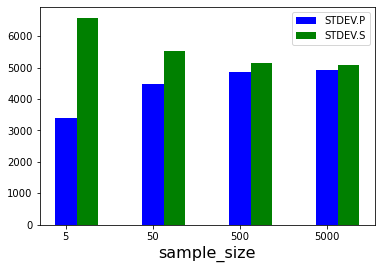

In [39]:
# Array of values representing proximity to population standard deviation
data = [[len(stdpop), len(stdpop2), len(stdpop3), len(stdpop4)],
  [len(stdsamp), len(stdsamp2), len(stdsamp3), len(stdsamp4)]]

# x labels
labels = ['5', '50', '500', '5000']

# Distance between each x-tick
x = np.arange(len(labels))

# Generate figure and axes
fig, ax = plt.subplots()

# Formatting of bar chart
X = np.arange(4)
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25, label='STDEV.P')
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25, label='STDEV.S')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel("sample_size", fontsize=16)
ax.legend()



plt.show()

It would appear that `STDEV.S` is indeed a more accurate estimation of the population standard deviation according my algorithm 


<br>



### References <br>

[1] Wikipedia; Standard deviation; https://en.wikipedia.org/wiki/Standard_deviation#Definition_of_population_values <br>
[2] BC Campus Open Textbooks; A Confidence Interval for a Population Standard Deviation Unknown, Small Sample Case; https://opentextbc.ca/introbusinessstatopenstax/chapter/a-confidence-interval-for-a-population-standard-deviation-unknown-small-sample-case/ <br>
[3] Statquest; Why dividing by N underestimates the variance; https://www.youtube.com/watch?v=sHRBg6BhKjI <br>
[4] Statquest; Statistics Fundamentals: The mean, variance and standard deviation; https://www.youtube.com/watch?v=SzZ6GpcfoQY <br>
[5] matplotlib.org; Grouped bar chart with labels; https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html <br>
[6] packtpub.com; Plotting multiple bar charts; https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781849513265/1/ch01lvl1sec16/plotting-multiple-bar-charts <br>

<br>

#### End task 3

***